# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Environment Setup

In [2]:
TARASLIA_1_PATH = '../data/TARASLIA_1.xls'
TARASLIA_2_PATH = '../data/TARASLIA_2.xls'
TARASLIA_3_PATH = '../data/TARASLIA_3.xls'
TARASLIA_4_PATH = '../data/TARASLIA_4.xls'
TARASLIA_5_PATH = '../data/TARASLIA_5.xls'
TARASLIA_6_PATH = '../data/TARASLIA_6.xls'
TARASLIA_7_PATH = '../data/TARASLIA_7.xls'
TARASLIA_8_PATH = '../data/TARASLIA_8.xls'

file_paths = [
    TARASLIA_1_PATH, TARASLIA_2_PATH, TARASLIA_3_PATH, TARASLIA_4_PATH,
    TARASLIA_5_PATH, TARASLIA_6_PATH, TARASLIA_7_PATH, TARASLIA_8_PATH
]

# Explore

In [3]:
for path in file_paths:
    # header=None prevents pandas from setting the first row as column headers
    df_info = pd.read_excel(path, nrows=1, header=None)
    
    # Extract the table title from the first cell
    table_title = df_info.iloc[0, 0]
    
    # Get the file name from the path
    file_name = path.split('/')[-1]
    
    print(f"{file_name}: {table_title}")

TARASLIA_1.xls: Table I. Proteins identified in the nornal mouse brain parts.
TARASLIA_2.xls: Table II. Proteins identified only in olfactory bulb
TARASLIA_3.xls: Table III. Proteins identified only in hippocampus 
TARASLIA_4.xls: Table IV. Proteins identified only in midbrain 
TARASLIA_5.xls: Table V. Proteins identified only in medulla 
TARASLIA_6.xls: Table VI. Proteins identified only in cerebellum 
TARASLIA_7.xls: Table VII. Proteins identified only in hypothalamus 
TARASLIA_8.xls: Table VIII. Proteins identified only in cortex


The Excel files contain a descriptive title in the first row. Here we extract the metadata and confirm what biological data each file contains before loading the full datasets.

In [4]:
df_all = pd.read_excel(TARASLIA_1_PATH, header=1) # all brain regions
df_ob = pd.read_excel(TARASLIA_2_PATH, header=1) # olfactory bulb
df_hc = pd.read_excel(TARASLIA_3_PATH, header=1) # hippocampus
df_mb = pd.read_excel(TARASLIA_4_PATH, header=1) # midbrain
df_md = pd.read_excel(TARASLIA_5_PATH, header=1) # medulla
df_cb = pd.read_excel(TARASLIA_6_PATH, header=1) # cerebellum
df_ht = pd.read_excel(TARASLIA_7_PATH, header=1) # hypothalamus
df_cc = pd.read_excel(TARASLIA_8_PATH, header=1) # cerebral cortex

taraslia_dfs_dict = {
    "All Brain Regions (Table I)": df_all,
    "Olfactory Bulb (Table II)": df_ob,
    "Hippocampus (Table III)": df_hc,
    "Midbrain (Table IV)": df_mb,
    "Medulla (Table V)": df_md,
    "Cerebellum (Table VI)": df_cb,
    "Hypothalamus (Table VII)": df_ht,
    "Cerebral Cortex (Table VIII)": df_cc
}

In [5]:
for title, df in taraslia_dfs_dict.items():
    print(f"\n{'='*20} {title} {'='*20}")

    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

    # Show only first 3 rows for a quick look
    display(df.head(3))

    # Compute missing values
    missing_counts = df.isnull().sum()
    missing_percent = (df.isnull().mean() * 100).round(2)

    # Compute duplicates
    duplicate_count = df.duplicated().sum()

    print("\nMissing values per column:")
    display(pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing %": missing_percent
    }))

    print(f"Duplicate rows: {duplicate_count}")
    print("-" * 60)


==================== All Brain Regions (Table I) ====================
Shape: 515 rows × 7 columns


,Accession Name,Protein name,Protein MW,pI-Value,Brain part,Subcellular localisation,Function
0,1433B_MOUSE,14-3-3 protein beta/alpha,28183,4.62,"OB, HT, MD",Cytoplasm,"Transcription rergulation, cytoplasmic sequest..."
1,1433E_MOUSE,14-3-3 protein epsilon,29326,4.50,"OB, MB, HT, HC, CB, MD",Cytoplasm,"Cerebral cortex development, hippocampus devel..."
2,1433F_MOUSE,14-3-3 protein eta,28365,4.66,OB,Cytoplasm,"Glucocorticoid catabolism, glucocorticoid rece..."



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.00
Protein name,0,0.00
Protein MW,0,0.00
pI-Value,0,0.00
Brain part,0,0.00
Subcellular localisation,19,3.69
Function,0,0.00


Duplicate rows: 0
------------------------------------------------------------

==================== Olfactory Bulb (Table II) ====================
Shape: 54 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,1433F_MOUSE,14-3-3 protein eta,64,40,28365,4.66
1,3HIDH_MOUSE,"3-hydroxyisobutyrate dehydrogenase, mitochondr...",112,40,35816,9.30
2,ACTBL_MOUSE,Beta-actin-like protein 2,58,22,42319,5.19



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.0
Protein name,0,0.0
Mascot Score,0,0.0
Coverage (%),0,0.0
Protein MW (Da),0,0.0
pI-Value,0,0.0


Duplicate rows: 0
------------------------------------------------------------

==================== Hippocampus (Table III) ====================
Shape: 62 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,AHSA1_MOUSE,Activator of 90 kDa heat shock protein ATPase ...,117,47,38321,5.3
1,AIP_MOUSE,AH receptor-interacting protein,65,25,38037,6.0
2,AMRP_MOUSE,Alpha-2-macroglobulin receptor-associated protein,135,38,42189,7.9



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.0
Protein name,0,0.0
Mascot Score,0,0.0
Coverage (%),0,0.0
Protein MW (Da),0,0.0
pI-Value,0,0.0


Duplicate rows: 0
------------------------------------------------------------

==================== Midbrain (Table IV) ====================
Shape: 9 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,6PGL_MOUSE,6-phosphogluconolactonase,69,43,27465,5.5
1,AT1A3_MOUSE,Sodium/potassium-transporting ATPase subunit a...,76,13,113045,5.1
2,CX4NB_MOUSE,Neighbor of COX4,56,30,23790,5.7



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.0
Protein name,0,0.0
Mascot Score,0,0.0
Coverage (%),0,0.0
Protein MW (Da),0,0.0
pI-Value,0,0.0


Duplicate rows: 0
------------------------------------------------------------

==================== Medulla (Table V) ====================
Shape: 10 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,AATM_MOUSE,"Aspartate aminotransferase, mitochondrial",96,26,47780,9.80
1,CNN1_MOUSE,Calponin-1,55,33,33506,9.60
2,DDX3L_MOUSE,Putative ATP-dependent RNA helicase Pl10,81,25,73494,6.82



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.0
Protein name,0,0.0
Mascot Score,0,0.0
Coverage (%),0,0.0
Protein MW (Da),0,0.0
pI-Value,0,0.0


Duplicate rows: 0
------------------------------------------------------------

==================== Cerebellum (Table VI) ====================
Shape: 5 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,4EBP2_MOUSE,Eukaryotic translation initiation factor 4E-bi...,55,80,13004,6.10
1,CB070_MOUSE,UPF0573 protein C2orf70 homolog,57,43,23113,10.06
2,CYC_MOUSE,"Cytochrome c, somatic",55,39,11712,10.19



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.0
Protein name,0,0.0
Mascot Score,0,0.0
Coverage (%),0,0.0
Protein MW (Da),0,0.0
pI-Value,0,0.0


Duplicate rows: 0
------------------------------------------------------------

==================== Hypothalamus (Table VII) ====================
Shape: 8 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,FBX16_MOUSE,F-box only protein 16,55,35,39362,10.64
1,K1C15_MOUSE,"Keratin, type I cytoskeletal 15",56,25,49278,4.60
2,LAP2B_MOUSE,"Lamina-associated polypeptide 2, isoforms beta...",60,27,50378,9.90



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.0
Protein name,0,0.0
Mascot Score,0,0.0
Coverage (%),0,0.0
Protein MW (Da),0,0.0
pI-Value,0,0.0


Duplicate rows: 0
------------------------------------------------------------

==================== Cerebral Cortex (Table VIII) ====================
Shape: 36 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,ABD12_MOUSE,Monoacylglycerol lipase ABHD12,87,32,45640,9.60
1,AL9A1_MOUSE,4-trimethylaminobutyraldehyde dehydrogenase,82,31,54449,6.77
2,ARK72_MOUSE,Aflatoxin B1 aldehyde reductase member 2,124,48,41028,9.30



Missing values per column:


,Missing Count,Missing %
Accession Name,0,0.0
Protein name,0,0.0
Mascot Score,0,0.0
Coverage (%),0,0.0
Protein MW (Da),0,0.0
pI-Value,0,0.0


Duplicate rows: 0
------------------------------------------------------------


The **Subcellular localisation** column is descriptive for protein function and does not seem to contain any identifiers. Therefore, these missing values will not interfere with the correlation analysis between brain regions.

**Master List (Table I):** This dataset serves as the primary source for identifying **common proteins**. The `Brain part` column contains comma-separated values (e.g., `OB, HT, MD`), which indicates that a single protein was identified across multiple regions.

**Unique Lists (Tables II–VIII):** These datasets are pre-filtered and contain proteins identified **only** in their respective brain regions. These will be used to define the "different" proteins per region.

For the comparison with previous studies, we will cross-reference the `Accession Name` (e.g., `1433B_MOUSE`) from the current tables against the proteins identified in previous studies mentioned in the literature.

# Correlation

In [6]:
# Create a dictionary of sets from the dataframes
# Note: we use 'Accession Name' as the unique identifier for each protein
protein_sets = {
    "OB": set(df_ob['Accession Name']),
    "HC": set(df_hc['Accession Name']),
    "MB": set(df_mb['Accession Name']),
    "MD": set(df_md['Accession Name']),
    "CB": set(df_cb['Accession Name']),
    "HT": set(df_ht['Accession Name']),
    "CC": set(df_cc['Accession Name'])
}

regions = list(protein_sets.keys())
matrix = pd.DataFrame(index=regions, columns=regions)

In [7]:
for r1 in regions:
    for r2 in regions:
        # Set intersection (&) finds proteins present in BOTH sets
        common_count = len(protein_sets[r1] & protein_sets[r2])
        matrix.loc[r1, r2] = common_count

print("Intersection Matrix (number of shared proteins):")
display(matrix)
# Convert the matrix dtypes from 'object' to 'int'
matrix = matrix.astype(int)

Intersection Matrix (number of shared proteins):


,OB,HC,MB,MD,CB,HT,CC
OB,54,0,0,0,0,0,0
HC,0,62,0,0,0,0,0
MB,0,0,9,1,0,0,0
MD,0,0,1,10,0,0,0
CB,0,0,0,0,5,0,0
HT,0,0,0,0,0,8,0
CC,0,0,0,0,0,0,36


The Intersection Matrix confirms that **Tables II-VIII** represent highly specific proteomic signatures. The fact that the diagonal values match the file row counts (e.g., 54 unique proteins for OB) and the off-diagonal values are almost entirely zero indicates that these tables contain proteins identified exclusively in those regions.

**Unique (Different) Proteins per Region:** <br>
The analysis confirms significant regional specialization. The number of proteins identified exclusively in each region is:
* Hippocampus (HC): 62 
* Olfactory Bulb (OB): 54
* Cerebral Cortex (CC): 36
* Medulla (MD): 10
* Midbrain (MB): 9
* Hypothalamus (HT): 8
* Cerebellum (CB): 5

**Common (Shared) Proteins:** <br>
* **Regional Overlap:** There is nearly zero overlap between the specific lists (Tables II-VIII), with the only intersection being **1 protein shared between the Midbrain and Medulla**.
* **Overall Connectivity:** Broadly shared proteins are listed in Table I, where identifiers like `1433E_MOUSE` are found in almost all brain parts (OB, MB, HT, HC, CB, MD), representing the "core" proteome of the mouse brain.

To identify **common proteins**, we must refer to **Table I**, where the `Brain part` column explicitly lists multiple regional overlaps for shared proteins (e.g., `OB, MB, HT, HC, CB, MD`).

In [13]:
# Define the mapping of abbreviations to full names
region_mapping = {
    "OB": "Olfactory Bulb",
    "HC": "Hippocampus",
    "MB": "Midbrain",
    "MD": "Medulla",
    "CB": "Cerebellum",
    "HT": "Hypothalamus",
    "CC": "Cerebral Cortex"
}

matrix.index = matrix.index.map(region_mapping)
matrix.columns = matrix.columns.map(region_mapping)

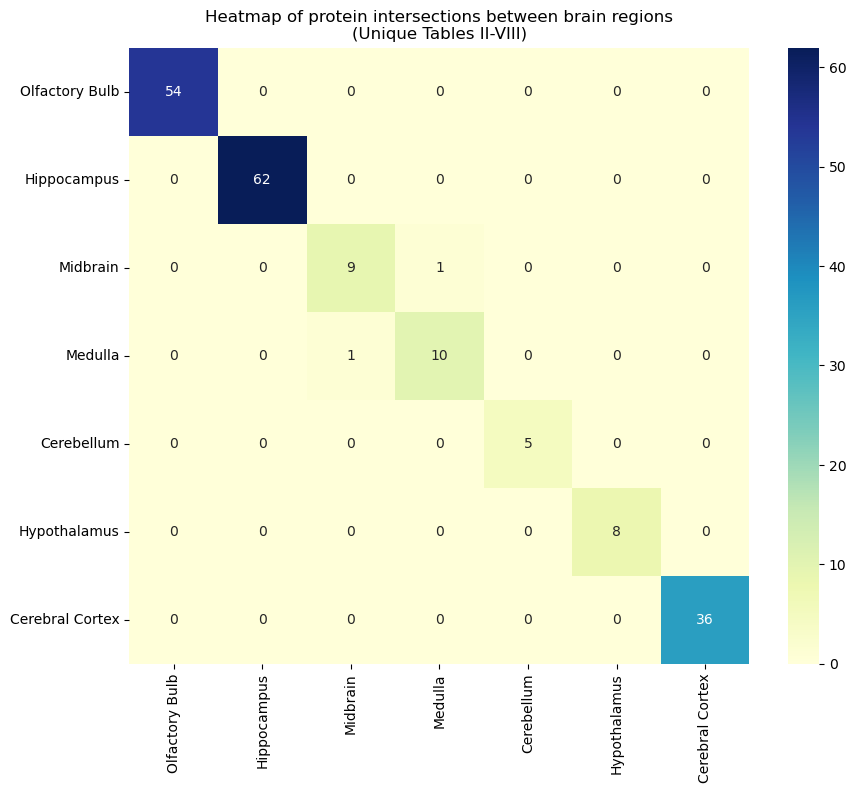

In [14]:
# Create a heatmap of the intersection matrix
plt.figure(figsize=(10, 8))
# annot=True puts the numbers in the boxes; cmap="YlGnBu" gives a nice blue/green look
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of protein intersections between brain regions\n(Unique Tables II-VIII)")
plt.show()

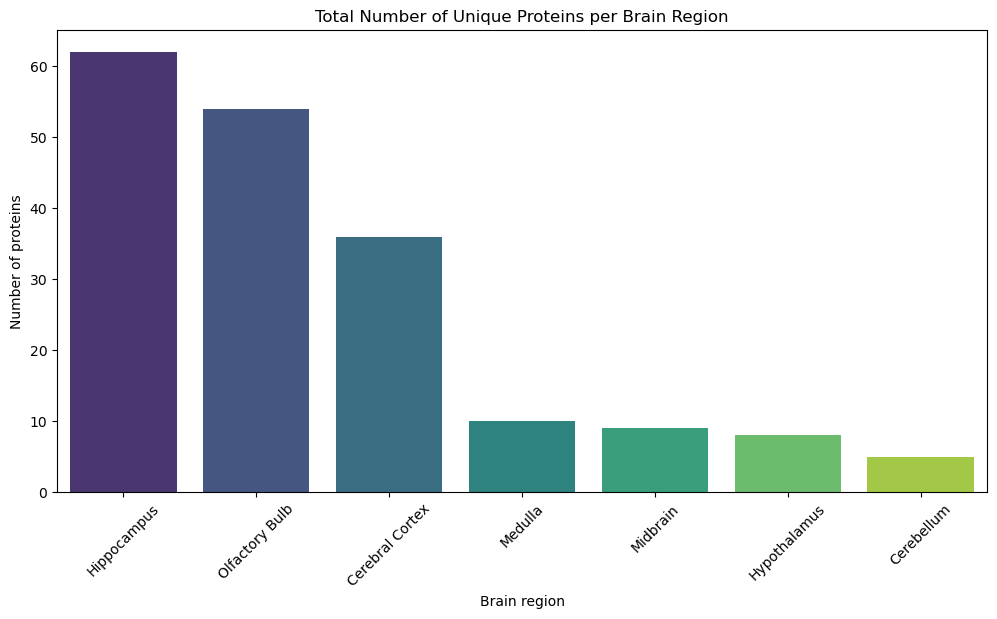

In [15]:
# Prepare the data
unique_counts = matrix.values.diagonal()
unique_series = pd.Series(unique_counts, index=matrix.index).sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))

sns.barplot(
    x=unique_series.index, 
    y=unique_series.values, 
    hue=unique_series.index, 
    palette="viridis", 
    legend=False
)

plt.title("Total Number of Unique Proteins per Brain Region")
plt.ylabel("Number of proteins")
plt.xlabel("Brain region")
plt.xticks(rotation=45) # Rotate labels so they don't overlap
plt.show()

In [12]:
df_exploded = df_all.copy()
# Split the string "OB, HT, MD" into a list ['OB', 'HT', 'MD']
df_exploded['Brain part'] = df_exploded['Brain part'].str.split(', ')
# Turn those lists into separate rows
df_exploded = df_exploded.explode('Brain part')

# Find common proteins - Count how many regions each protein appears in
protein_counts = df_all['Brain part'].str.split(', ').str.len()

# Proteins common to ALL regions (7 regions in total)
common_to_all = df_all[protein_counts == 7]

# Proteins common to MULTIPLE regions (more than 1)
common_proteins = df_all[protein_counts > 1]

print(f"Total proteins identified: {len(df_all)}")
print(f"Proteins common to all 7 regions: {len(common_to_all)}")
print(f"Proteins common to multiple regions: {len(common_proteins)}")

display(common_to_all[['Accession Name', 'Protein name', 'Brain part']].head(3))

Total proteins identified: 515
Proteins common to all 7 regions: 41
Proteins common to multiple regions: 334


,Accession Name,Protein name,Brain part
3,1433G_MOUSE,14-3-3 protein gamma,"OB, CC, MB, HT, HC, CB, MD"
5,1433Z_MOUSE,14-3-3 protein zeta/delta,"ΟΒ, CC, MB, HT, HC, CB, MD"
13,ACON_MOUSE,"Aconitate hydratase, mitochondrial","OB, CC, MB, HT, HC, CB, MD"
